<a href="https://colab.research.google.com/github/kartikchechani/Self_Organizing_Maps/blob/master/Detecting_Frauds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

##Install MiniSom Package

In [5]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=24242f2b90b27bc765ae4ffa88f4d817b104696fc57768e8ffb8517967762277
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
dataset = pd.read_csv('/content/Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

## Feature Scaling


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [6]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)
y_y = []
for i in range(0,690):
  y_y.append(y[i][0])

y = y_y

##Visualizing the results


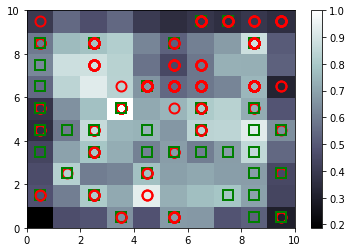

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [18]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,5)],mappings[(4,1)]),axis=0)
frauds = sc.inverse_transform(frauds)
frauds_new = []

for i in range(0,27):
  frauds_new.append(frauds[i][0])

frauds = frauds_new
frauds  


[15767264.0,
 15704581.0,
 15761854.0,
 15725776.0,
 15815040.0,
 15697460.0,
 15788442.0,
 15737998.0,
 15718921.0,
 15633944.0,
 15607988.0,
 15801072.0,
 15683993.0,
 15797767.0,
 15744044.0,
 15632010.0,
 15804235.0,
 15627365.0,
 15573798.0,
 15700300.0,
 15647295.0,
 15791944.0,
 15576680.0,
 15620570.0,
 15592412.0,
 15580914.0,
 15607986.0]

##Printing the Fraunch Clients